In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import numpy as np
from datetime import datetime
import yfinance as yf



In [2]:
start=datetime(2015,1,1)
end=datetime(2024,1,1)

In [3]:
artl = yf.download('BHARTIARTL.NS', start=start, end=end)
titan = yf.download('TITAN.NS', start=start, end=end)
asnpt = yf.download('ASIANPAINT.NS', start=start, end=end)
pdlt = yf.download('PIDILITIND.NS', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
artl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,319.405579,328.868774,316.927124,327.066254,312.380219,2460188
2015-01-02,327.877380,330.761414,326.255127,329.003967,314.230865,2795887
2015-01-05,330.085480,330.085480,320.487091,321.703766,307.258484,1605267
2015-01-06,320.937714,320.937714,313.998016,319.180267,304.848297,3916948
2015-01-07,317.197479,322.650116,315.890686,319.946320,305.579987,4899318


In [5]:
titan.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,381.299988,382.549988,377.799988,379.799988,365.005798,269753
2015-01-02,379.799988,388.500000,379.799988,382.799988,367.888947,623981
2015-01-05,384.000000,389.600006,382.799988,385.899994,370.868164,551576
2015-01-06,382.200012,383.399994,369.200012,372.700012,358.182404,519159
2015-01-07,372.899994,377.399994,370.000000,374.600006,360.008331,397373


In [6]:
asnpt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,751.099976,754.500000,747.000000,749.150024,703.691223,284935
2015-01-02,751.250000,781.450012,751.250000,775.049988,728.019531,2080850
2015-01-05,779.900024,787.900024,772.700012,775.000000,727.972473,1326999
2015-01-06,775.000000,783.000000,750.400024,756.500000,710.595093,1510720
2015-01-07,763.400024,778.349976,759.250000,771.700012,724.872742,1427667


In [7]:
pdlt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,543.900024,554.700012,534.950012,549.250000,525.166016,172606
2015-01-02,558.000000,569.700012,558.000000,559.900024,535.349060,467951
2015-01-05,562.500000,565.599976,550.000000,551.799988,527.604248,188921
2015-01-06,551.900024,552.000000,525.000000,526.599976,503.509125,409674
2015-01-07,528.099976,533.700012,519.000000,519.950012,497.150757,610690


In [8]:
stocks = pd.concat([artl['Adj Close'],titan['Adj Close'],asnpt['Adj Close'],pdlt['Adj Close']],axis=1)
stocks.columns = ['artl','titan','asnpt','pdlt']

In [9]:
stocks.head()

,artl,titan,asnpt,pdlt
Date,,,,
2015-01-01,312.380219,365.005798,703.691223,525.166016
2015-01-02,314.230865,367.888947,728.019531,535.349060
2015-01-05,307.258484,370.868164,727.972473,527.604248
2015-01-06,304.848297,358.182404,710.595093,503.509125
2015-01-07,305.579987,360.008331,724.872742,497.150757


In [10]:
lret = np.log(stocks/stocks.shift(1))
lret.dropna(inplace=True)

In [11]:
lret

,artl,titan,asnpt,pdlt
Date,,,,
2015-01-02,0.005907,0.007868,0.033988,0.019205
2015-01-05,-0.022439,0.008066,-0.000065,-0.014573
2015-01-06,-0.007875,-0.034804,-0.024160,-0.046745
2015-01-07,0.002397,0.005085,0.019893,-0.012709
2015-01-08,0.017176,-0.004548,0.061135,-0.000289
...,...,...,...,...
2023-12-22,0.011843,0.013140,0.011544,0.010400
2023-12-26,0.010355,0.008059,0.012506,0.009226
2023-12-27,0.021128,0.008862,0.006217,0.011608


In [12]:
iterations = 5000

ret_arr = np.zeros(iterations)
vol_arr = np.zeros(iterations)
sr_arr = np.zeros(iterations)
wt_arr = np.zeros((iterations,len(stocks.columns)))

In [13]:
wt_arr

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [14]:
wt_arr.shape

(5000, 4)

In [15]:
for i in range(iterations):
    w = np.random.random(len(stocks.columns))
    w = w/np.sum(w)
    wt_arr[i,:] = w
    ret_arr[i]=np.sum(lret.mean()*252*w)
    vol_arr[i]=np.sqrt(np.dot(w.T,np.dot(lret.cov()*252,w)))
    sr_arr[i]=ret_arr[i]/vol_arr[i]

In [16]:
res = sr_arr.max()

In [17]:
res

1.0305244620571168

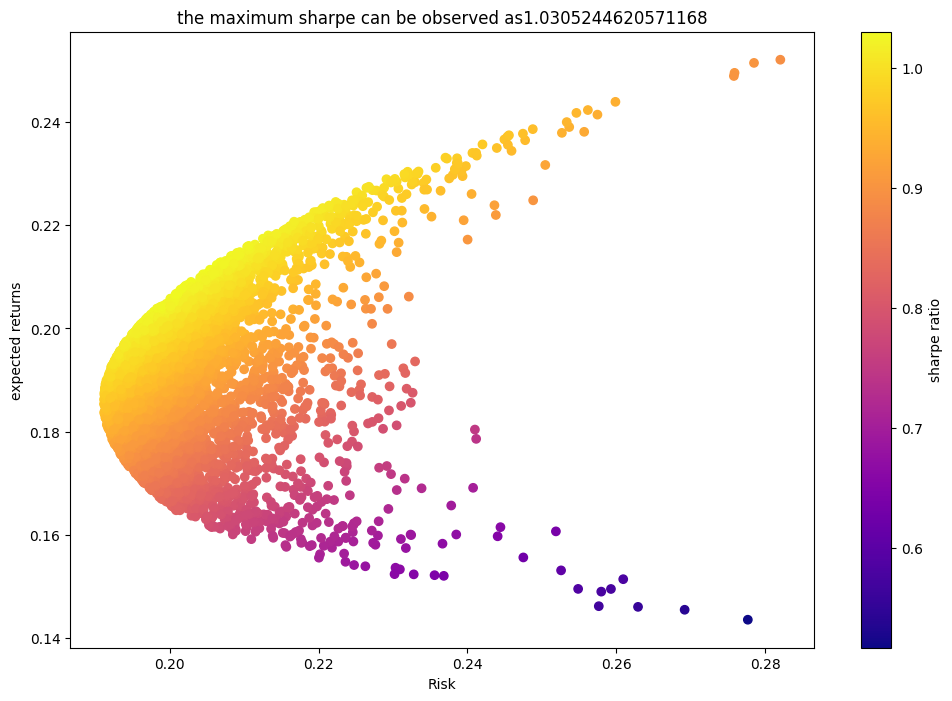

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sr_arr,cmap='plasma')
plt.colorbar(label='sharpe ratio')
plt.xlabel("Risk")
plt.ylabel("expected returns")
plt.title("the maximum sharpe can be observed as" + str(res))
plt.show()